<a href="https://colab.research.google.com/github/mnrazamohamed/NLP-Prediction-Task/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

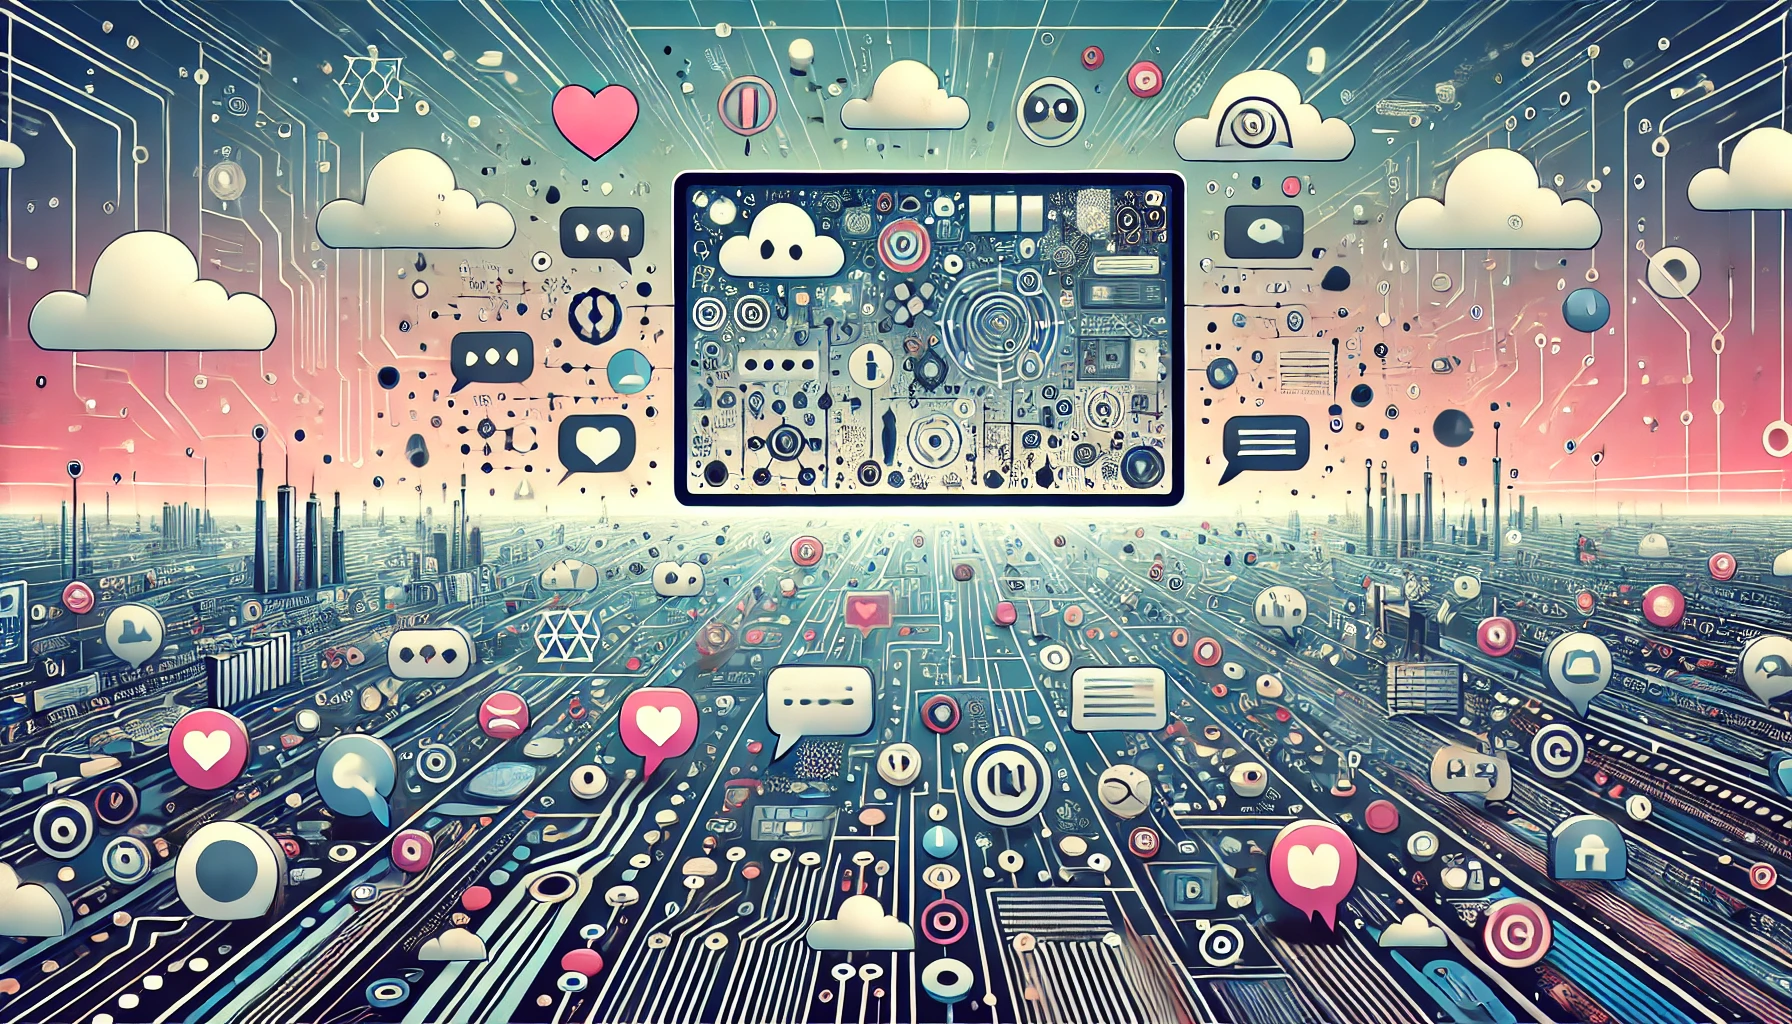

# **Identifying Offensive Posts in Social Media**

Name: Mohamed Nawas Raza Mohamed

Student Number: 24148501

Module: Applied AI - Natural Language Processing

Project Overview: In this project, I am developing a system using Natural Language Processing (NLP) techniques to detect offensive content on social media platforms. The goal is to create an automated solution that helps identify and classify harmful posts, which can then be moderated effectively. By applying advanced machine learning models and analyzing different types of offensive language, this project seeks to enhance online safety and promote healthier digital interactions.

## Installation of Scikit-learn

Ensures the project uses a specific version (1.3.2) of scikit-learn by reinstalling it, which is essential for the compatibility and functionality of the machine learning models.

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.2 MB/s eta 0:00:00


## Google Drive Integration

Mounts Google Drive to the Colab environment to access files such as datasets or models stored in the cloud directly from the notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Path Setup

Defines the file paths for training and testing datasets located on Google Drive, preparing them for subsequent data loading and analysis.

In [ ]:
train_path = '/content/drive/MyDrive/BCU - MSc in AI/NLP ASMT/train.csv'
test_path = '/content/drive/MyDrive/BCU - MSc in AI/NLP ASMT/test.csv'

## Importing Pandas
Imports the pandas library, a fundamental tool for data manipulation and analysis, crucial for managing the project's datasets.


In [ ]:
import pandas as pd

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## Quick Look at the Training Data
Displays the first few rows of the training dataset to confirm correct data loading and to provide an overview of the dataset structure.


In [ ]:
# Quick look at the data
print(train_df.head())

      id                                              tweet label
0  86426  @USER She should ask a few native Americans wh...   UNT
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...   TIN
2  16820  Amazon is investigating Chinese employees who ...   NOT
3  62688  @USER Someone should'veTaken" this piece of sh...   UNT
4  43605  @USER @USER Obama wanted liberals &amp; illega...   NOT


## Quick Look at the Testing Data
Shows the first few entries of the testing dataset, offering a preliminary view of the test set format and content.


In [ ]:
print(test_df.head())

      id                                              tweet
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1  27014  #ConstitutionDay is revered by Conservatives, ...
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3  13876  #Watching #Boomer getting the news that she is...
4  60133  #NoPasaran: Unity demo to oppose the far-right...


## Training Dataset Information
Generates a summary of the training dataset, including row count, null values, and data types for each column, aiding in data cleaning and analysis.


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13240 non-null  int64 
 1   tweet   13240 non-null  object
 2   label   13240 non-null  object
dtypes: int64(1), object(2)
memory usage: 310.4+ KB
None


## Testing Dataset Information
Displays detailed information about the testing dataset, including the total number of rows, presence of null values, and data types of each column.


In [ ]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      460 non-null    int64 
 1   tweet   460 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.3+ KB
None


## Checking Label Distribution
Prints the count of each label in the training dataset, offering insight into the class balance (e.g., number of NOT, TIN, and UNT instances).


In [ ]:
# Check label distribution
print(train_df['label'].value_counts())

label
NOT    8840
TIN    3876
UNT     524
Name: count, dtype: int64


## Tweet Length Distribution
Uses seaborn to plot a histogram of tweet lengths in the training dataset, providing a visual overview of how tweet sizes vary. Also computes basic descriptive statistics such as mean, min, and max tweet length.


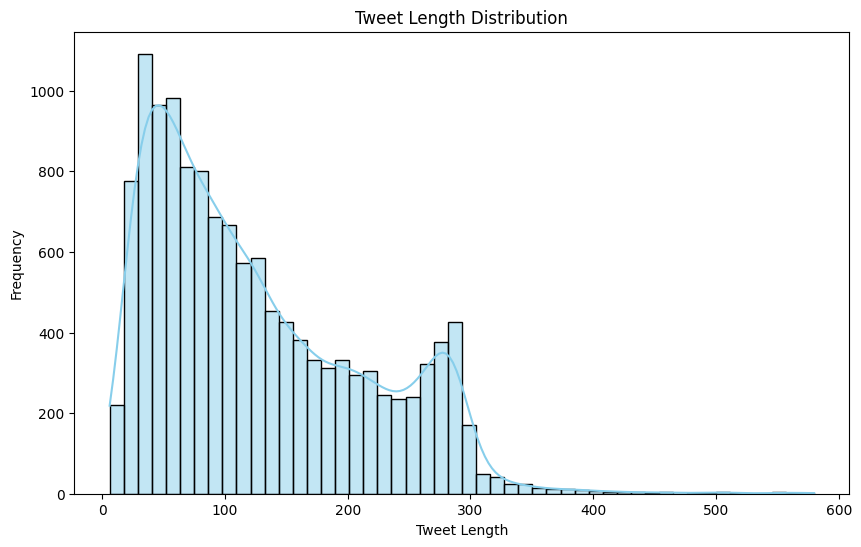

Tweet Length Summary:
count    13240.000000
mean       125.865257
std         86.647693
min          6.000000
25%         55.000000
50%        102.000000
75%        185.000000
max        580.000000
Name: tweet_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Tweet Length Distribution
train_df['tweet_length'] = train_df['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['tweet_length'], bins=50, kde=True, color='skyblue')
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

print("Tweet Length Summary:")
print(train_df['tweet_length'].describe())

## Tweet Length Distribution (Test Data)
Creates a new column representing tweet length in the testing dataset and visualizes it with a histogram using seaborn. This helps analyze how long tweets typically are and identifies any unusual length patterns.


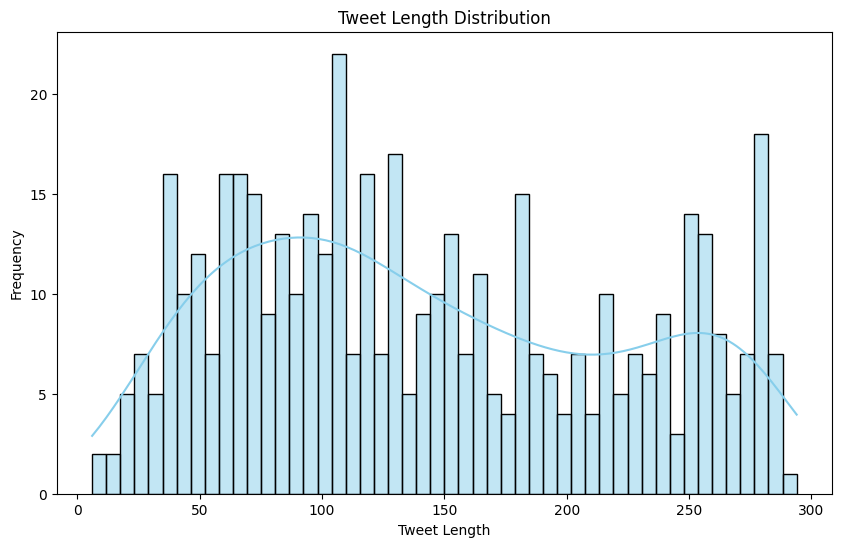

Tweet Length Summary:
count    460.000000
mean     142.900000
std       78.024176
min        6.000000
25%       76.750000
50%      130.000000
75%      208.250000
max      294.000000
Name: tweet_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Tweet Length Distribution
test_df['tweet_length'] = test_df['tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(test_df['tweet_length'], bins=50, kde=True, color='skyblue')
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

print("Tweet Length Summary:")
print(test_df['tweet_length'].describe())

## Label Distribution
Uses seaborn's countplot to visualize the frequency of each label in the training dataset. This chart quickly indicates whether the data is balanced or imbalanced among the different classes.


<ipython-input-12-6386d4846c5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')


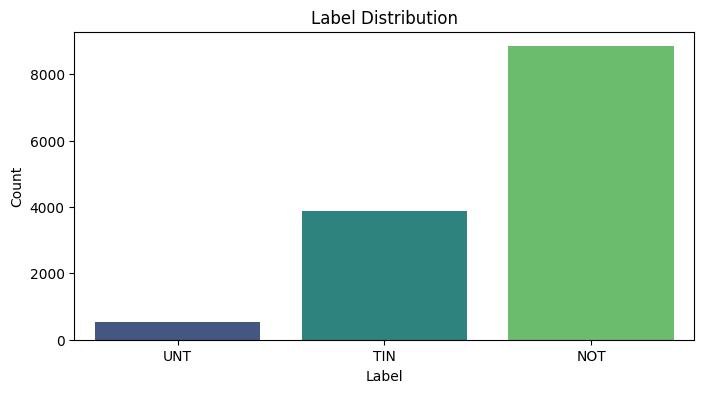

In [ ]:
# 2. Label Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


## Word Cloud for All Tweets
Combines all tweets in the training dataset into a single text string and generates a word cloud using the WordCloud library. This visualization highlights the most frequently used words, offering quick insights into the main topics present in the data.


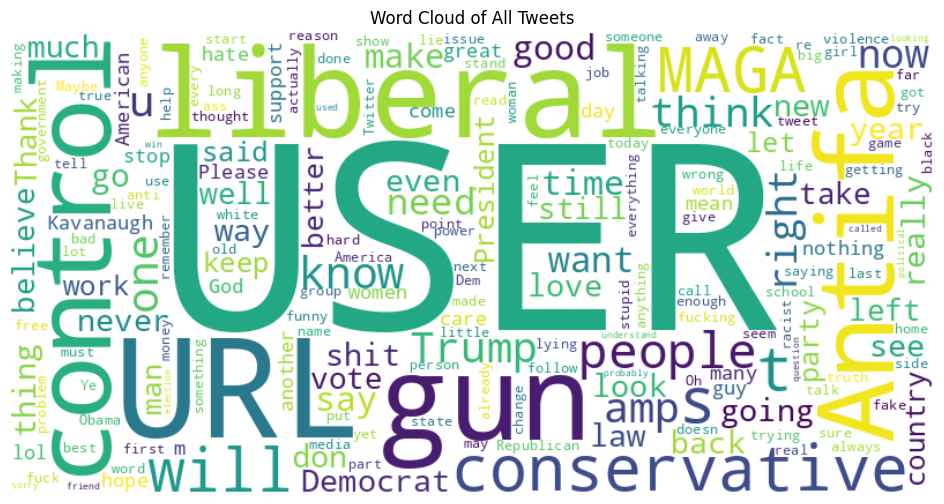

In [ ]:
# 3. Word Cloud for All Tweets
all_text = ' '.join(train_df['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

## Lowercasing Tweets
Converts all tweet text in both the training and testing datasets to lowercase for consistency. Displays the first few rows to confirm that the transformation was applied correctly.


In [ ]:
# Convert tweet text to lowercase
train_df['clean_tweet'] = train_df['tweet'].str.lower()
test_df['clean_tweet'] = test_df['tweet'].str.lower()


# Display the first few rows to verify
print(train_df[['tweet', 'clean_tweet']].head())


                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home you’re drunk!!! @USER #MAG...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0  @user she should ask a few native americans wh...  
1  @user @user go home you’re drunk!!! @user #mag...  
2  amazon is investigating chinese employees who ...  
3  @user someone should'vetaken" this piece of sh...  
4  @user @user obama wanted liberals &amp; illega...  


## Removing URLs, Mentions, and Hashtags
Defines a function that uses regular expressions to remove URLs, user mentions (e.g., @USER), and hashtags (e.g., #example) from tweets. This cleaning function is then applied to the lowercase tweet text in both datasets, and a sample output is displayed to confirm the changes.


In [ ]:
import re

def remove_urls_mentions_hashtags(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove mentions (e.g., @USER)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (e.g., #example)
    text = re.sub(r'#\w+', '', text)
    return text

# Apply the function to the lowercase tweets
train_df['clean_tweet'] = train_df['clean_tweet'].apply(remove_urls_mentions_hashtags)
test_df['clean_tweet'] = test_df['clean_tweet'].apply(remove_urls_mentions_hashtags)

# Display a few examples to verify the changes
print(train_df[['tweet', 'clean_tweet']].head())


                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home you’re drunk!!! @USER #MAG...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0   she should ask a few native americans what th...  
1                go home you’re drunk!!!    👊🇺🇸👊 url  
2  amazon is investigating chinese employees who ...  
3   someone should'vetaken" this piece of shit to...  
4    obama wanted liberals &amp; illegals to move...  


## Removing Punctuation and Numbers
Uses another function that applies a regex pattern to keep only letters and whitespace, stripping out any punctuation or numeric characters. This further refines the cleaned tweet text, and a few examples are shown to verify the results.

In [ ]:
def remove_punctuation_numbers(text):
    # This regex keeps only lowercase letters and whitespace.
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply the function to clean the tweets further
train_df['clean_tweet'] = train_df['clean_tweet'].apply(remove_punctuation_numbers)
test_df['clean_tweet'] = test_df['clean_tweet'].apply(remove_punctuation_numbers)

# Display a few examples to verify the changes
print(train_df[['tweet', 'clean_tweet']].head())


                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home you’re drunk!!! @USER #MAG...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0   she should ask a few native americans what th...  
1                        go home youre drunk     url  
2  amazon is investigating chinese employees who ...  
3   someone shouldvetaken this piece of shit to a...  
4    obama wanted liberals amp illegals to move i...  


## Installing Emoji Library
Ensures that the 'emoji' library is installed, which is required to handle the conversion of emojis into textual representations.


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.6 MB/s eta 0:00:00


## Converting Emojis to Text
Imports the 'emoji' library and defines a function that replaces emojis with their corresponding text. This function is applied to the training and testing datasets, and a sample output is displayed to verify successful conversion.


In [ ]:
import emoji

def convert_emojis_to_text(text):
    # This function converts emojis to their corresponding text representation.
    return emoji.demojize(text)

# Create a new column that converts emojis to text
train_df['clean_tweet'] = train_df['clean_tweet'].apply(convert_emojis_to_text)
test_df['clean_tweet'] = test_df['clean_tweet'].apply(convert_emojis_to_text)

# Display a few examples to verify the conversion
print(train_df[['tweet', 'clean_tweet']].head())

                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home you’re drunk!!! @USER #MAG...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0   she should ask a few native americans what th...  
1                        go home youre drunk     url  
2  amazon is investigating chinese employees who ...  
3   someone shouldvetaken this piece of shit to a...  
4    obama wanted liberals amp illegals to move i...  


## Removing Stopwords
Downloads and imports stopwords from the NLTK library, then defines a function to remove these common words from the tweet text. Applies this function to both datasets and shows sample rows to confirm the changes.








In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define the stopwords set
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

# Apply stopwords removal
train_df['clean_tweet'] = train_df['clean_tweet'].apply(remove_stopwords)
test_df['clean_tweet'] = test_df['clean_tweet'].apply(remove_stopwords)

# Verify the changes
print(train_df[['tweet', 'clean_tweet']].head())


                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home you’re drunk!!! @USER #MAG...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0                          ask native americans take  
1                            go home youre drunk url  
2  amazon investigating chinese employees selling...  
3           someone shouldvetaken piece shit volcano  
4  obama wanted liberals amp illegals move red st...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Lemmatizing Tweets
Utilizes spaCy's English model to convert words to their base or “lemma” forms. This process normalizes different word variations, which can improve model performance by providing more consistent features.


In [ ]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    # Use token.lemma_ and filter out punctuation and spaces if needed
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])

# Replace the previous stemming step with lemmatization
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lemmatize_text)
test_df['clean_tweet'] = test_df['clean_tweet'].apply(lemmatize_text)
print(train_df[['tweet', 'clean_tweet']].head())


                                               tweet  \
0  @USER She should ask a few native Americans wh...   
1  @USER @USER Go home you’re drunk!!! @USER #MAG...   
2  Amazon is investigating Chinese employees who ...   
3  @USER Someone should'veTaken" this piece of sh...   
4  @USER @USER Obama wanted liberals &amp; illega...   

                                         clean_tweet  
0                          ask native americans take  
1                           go home you re drunk url  
2  amazon investigate chinese employee sell inter...  
3           someone shouldvetaken piece shit volcano  
4     obama want liberals amp illegal move red state  


## TF-IDF Vectorization
Applies the TF-IDF (Term Frequency–Inverse Document Frequency) technique to transform the cleaned tweets into numerical feature vectors. This representation highlights the importance of words within each tweet and across the dataset, aiding in effective text classification.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
# Fit and transform the clean_tweet column
X = vectorizer.fit_transform(train_df['clean_tweet'])
X_test = vectorizer.transform(test_df['clean_tweet'])

# Optionally, check the shape of the resulting matrix
print("TF-IDF matrix shape:", X.shape)
print("TF-IDF matrix shape:", X_test.shape)


TF-IDF matrix shape: (13240, 5000)
TF-IDF matrix shape: (460, 5000)


## Label Encoding and Train-Validation Split
Uses a LabelEncoder to convert categorical labels into numerical form and then splits the feature matrix (X) and label vector (y) into training (70%) and validation (30%) sets. This step is crucial for model development and testing.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the labels into numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(train_df['label'])

# Split the TF-IDF features (X) and labels (y) into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8505)


## Installing CatBoost
Installs the CatBoost library, a popular gradient boosting framework that can handle categorical features effectively and often delivers high performance on tabular data.

In [ ]:
!pip install catboost

## CatBoost Wrapper
Defines a custom wrapper class (CatBoostWrapper) inheriting from scikit-learn’s BaseEstimator and ClassifierMixin. It encapsulates CatBoost’s training, prediction, and probability methods, and includes a save() method leveraging CatBoost’s built-in model-saving functionality. This approach ensures the CatBoost model can be used seamlessly alongside other scikit-learn estimators.


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from catboost import CatBoostClassifier

class CatBoostWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **params):
        params.setdefault('logging_level', 'Silent')
        self.model = CatBoostClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        preds = self.model.predict(X)
        # Ensure predictions are 1D
        return preds.ravel()

    def predict_proba(self, X):
        # Forward the call to the underlying CatBoost model
        return self.model.predict_proba(X)

    def save(self, filepath):
        # Use CatBoost's built-in save_model method
        self.model.save_model(filepath)


## Model Imports and Dictionary
Brings in various classification algorithms (LogisticRegression, RandomForest, etc.) and organizes them in a dictionary, mapping short names to initialized models for quick comparison and evaluation.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier


# List of 10 advanced models as a dictionary with short names
models_dict = {
    "CB": CatBoostWrapper( random_state=42),
    "ET": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGB": XGBClassifier( eval_metric='mlogloss', random_state=42),

    "LR": LogisticRegression(max_iter=1000, random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
    "SVC": LinearSVC(random_state=42),
    "NB": MultinomialNB(),
    "GB": GradientBoostingClassifier(random_state=42),
    "AB": AdaBoostClassifier(random_state=42),
    "MLP": MLPClassifier(max_iter=300, random_state=42)
}

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Ensemble Voting
Defines two VotingClassifier ensembles: one with hard (majority) voting and another with soft (probabilistic) voting, each combining ExtraTrees, RandomForest, XGBoost, and CatBoost for potentially improved predictive performance.


In [ ]:
# Ensemble voting
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

voting_hard = VotingClassifier(
   estimators=[
        ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
        ('cb', CatBoostWrapper(random_state=42))
    ],
    voting='hard'
)


voting_soft = VotingClassifier(
   estimators=[
        ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
        ('cb', CatBoostWrapper(random_state=42))
    ],
    voting='soft'
)

models_dict['Voting Hard'] = voting_hard
models_dict['Voting Soft'] = voting_soft

## K-Fold Cross Validation and Model Evaluation
Performs 5-fold cross-validation for each model in models_dict, computing and averaging training/validation accuracy, precision, recall, F1-score, and confusion matrices. The results (including per-class metrics) are stored in a dictionary and summarized in a pandas DataFrame for easy comparison.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Dictionary to store results for each model
results = {}

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each model
for name, model in models_dict.items():
    print(f"Training model: {name}")

    train_accuracies = []
    val_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    cm_list = []
    reports = []

    # Perform K-Fold Cross Validation
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_tr, y_val_fold = y_train[train_idx], y_train[val_idx]

        # Fit the model on training fold
        model.fit(X_tr, y_tr)

        # Predictions on training and validation folds
        y_train_pred = model.predict(X_tr)
        y_val_pred = model.predict(X_val_fold)

        # Compute accuracy
        train_acc = accuracy_score(y_tr, y_train_pred)
        val_acc = accuracy_score(y_val_fold, y_val_pred)

        # Compute weighted precision, recall, and F1-score
        prec = precision_score(y_val_fold, y_val_pred, average='weighted')
        rec = recall_score(y_val_fold, y_val_pred, average='weighted')
        f1 = f1_score(y_val_fold, y_val_pred, average='weighted')

        # Compute confusion matrix
        cm = confusion_matrix(y_val_fold, y_val_pred)
        cm_list.append(cm)

        # Compute classification report
        report = classification_report(y_val_fold, y_val_pred, target_names=encoder.classes_, output_dict=True)
        reports.append(report)

        # Store metrics
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)

    # Average confusion matrix over folds
    cm_avg = np.mean(cm_list, axis=0).astype(int)

    # Convert classification report into per-class precision, recall, F1-score
    avg_report = {}
    for class_label in encoder.classes_:
        avg_report[class_label] = {
            "Precision": np.mean([report[class_label]["precision"] for report in reports]),
            "Recall": np.mean([report[class_label]["recall"] for report in reports]),
            "F1-Score": np.mean([report[class_label]["f1-score"] for report in reports]),
        }

    # Store results in dictionary
    results[name] = {
        "Train Accuracy": np.mean(train_accuracies),
        "Val Accuracy": np.mean(val_accuracies),
        "Acc Diff": np.mean(train_accuracies) - np.mean(val_accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1-Score": np.mean(f1_scores),
        "Confusion Matrix": cm_avg,
        "Per-Class Report": avg_report,
    }

    # Print evaluation metrics
    print(f"Results for {name}:")
    print(f"Train Accuracy: {results[name]['Train Accuracy']:.4f}")
    print(f"Val Accuracy: {results[name]['Val Accuracy']:.4f}")
    print(f"Acc Diff: {results[name]['Acc Diff']:.4f}")
    print(f"Precision: {results[name]['Precision']:.4f}")
    print(f"Recall: {results[name]['Recall']:.4f}")
    print(f"F1-Score: {results[name]['F1-Score']:.4f}")
    print("Confusion Matrix:\n", results[name]["Confusion Matrix"])
    print("------------------------------------------------------")

# Convert results to a DataFrame (excluding confusion matrix and detailed per-class reports)
results_df = pd.DataFrame(results).T.drop(columns=["Confusion Matrix", "Per-Class Report"])


## Results Table
Organizes the averaged cross-validation metrics (accuracy, precision, recall, F1-score, etc.) into a pandas DataFrame (results_df), enabling an at-a-glance comparison of model performance.


In [ ]:
results_df

,Train Accuracy,Val Accuracy,Acc Diff,Precision,Recall,F1-Score
CB,0.797907,0.747519,0.050387,0.712428,0.747519,0.705831
ET,0.991449,0.741693,0.249756,0.713902,0.741693,0.718713
RF,0.991449,0.750217,0.241232,0.724878,0.750217,0.716115
XGB,0.845382,0.74547,0.099912,0.720765,0.74547,0.708483
LR,0.817329,0.73716,0.080168,0.698854,0.73716,0.694426
LGBM,0.847054,0.730472,0.116582,0.697117,0.730472,0.69754
SVC,0.911955,0.725723,0.186232,0.695813,0.725723,0.702873
NB,0.759171,0.715581,0.043591,0.6842,0.715581,0.642434
GB,0.770285,0.738671,0.031614,0.718552,0.738671,0.68628
AB,0.725966,0.720544,0.005422,0.691888,0.720544,0.657392


## Saving Trained Models
Uses the os and joblib libraries to create a directory on Google Drive and save each model. CatBoost models are saved in .bin format, while others are saved as .pkl files, ensuring easy reusability and deployment.

In [ ]:
import os
import joblib

# Define your directory on Google Drive where the models will be saved
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/NLP ASMT/models'
os.makedirs(save_dir, exist_ok=True)

for name, model in models_dict.items():
    save_path = os.path.join(save_dir, f'{name}')
    try:
        if isinstance(model, CatBoostWrapper):
            # Save using the custom save() method with a .bin extension for CatBoost
            model.save(save_path + '.bin')
        else:
            # Save other models using joblib with a .pkl extension
            joblib.dump(model, save_path + '.pkl')
        print(f"Saved model {name} successfully.")
    except Exception as e:
        print(f"Error saving model {name}: {e}")


Saved model CB successfully.
Saved model ET successfully.
Saved model RF successfully.
Saved model XGB successfully.
Saved model LR successfully.
Saved model LGBM successfully.
Saved model SVC successfully.
Saved model NB successfully.
Saved model GB successfully.
Saved model AB successfully.
Saved model MLP successfully.
Saved model Voting Hard successfully.
Saved model Voting Soft successfully.


## Loading and Predicting with the Saved Model
Loads the pre-trained "Voting Soft" model, applies the same TF-IDF vectorization on test data, makes predictions, and converts them back to their original categorical labels for interpretation.


In [ ]:
import os
import joblib

# Define the directory where models are saved
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/NLP ASMT/models'

# Load the Voting Soft model
voting_soft_model_path = os.path.join(save_dir, 'Voting Soft.pkl')
voting_soft_model = joblib.load(voting_soft_model_path)

# Ensure the test data is vectorized using the same vectorizer
X_test = vectorizer.transform(test_df['clean_tweet'])

# Make predictions
test_df['predictions'] = voting_soft_model.predict(X_test)

test_df['predicted_label'] = encoder.inverse_transform(test_df['predictions'])



## Checking test_df Output
Displays the contents of test_df to verify that predictions and necessary columns are correctly stored before exporting the results.


In [ ]:
test_df

,id,tweet,tweet_length,clean_tweet,predictions,predicted_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,245,democrats support antifa muslim brotherhood ms...,1,TIN
1,27014,"#ConstitutionDay is revered by Conservatives, ...",111,revere conservative hate progressivessocialist...,1,TIN
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,204,first reduce can url,0,NOT
3,13876,#Watching #Boomer getting the news that she is...,139,get news still parole always make smile finale...,0,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,98,unity demo oppose farright enough enough url,0,NOT
...,...,...,...,...,...,...
455,22569,"#Antifa are mentally unstable cowards, pretend...",69,mentally unstable coward pretend relevant url,1,TIN
456,48938,@USER @USER And Browning looked like dog shit ...,93,brown look like dog shit fcs school what s point,1,TIN
457,41438,All two of them taste like ass. URL,35,two taste like ass url,1,TIN
458,73439,#DespicableDems lie again about rifles. Dem Di...,121,lie rifle dem distorted law push guncontrol ka...,0,NOT


## Saving Predictions to CSV
Creates a DataFrame with tweet IDs and predicted labels, renames the column for clarity, and saves the results as a CSV file in Google Drive for further analysis or deployment.


In [ ]:
import os

# Define the save directory
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/NLP ASMT'

# Create a new DataFrame with required columns and rename 'predicted_label' to 'predictions'
predictions_df = test_df[['id', 'tweet', 'predicted_label']].rename(columns={'predicted_label': 'predictions'})

# Define save path
save_path = os.path.join(save_dir, 'predictions.csv')

# Save to CSV
predictions_df.to_csv(save_path, index=False)

print(f"Predictions saved successfully at: {save_path}")



Predictions saved successfully at: /content/drive/MyDrive/BCU - MSc in AI/NLP ASMT/predictions.csv
